In [37]:
import pandas as pd

df = pd.read_csv("../data/rental/rental.csv")

print(df.shape)
df.head()

(35520, 8)


,month,city,state,Studio,1br,2br,3br,4br
0,2014-01-01,King of Prussia,PA,888.0,1054.0,1273.0,1592.0,1772.0
1,2014-02-01,King of Prussia,PA,891.0,1058.0,1277.0,1597.0,1778.0
2,2014-03-01,King of Prussia,PA,897.0,1065.0,1285.0,1608.0,1789.0
3,2014-04-01,King of Prussia,PA,897.0,1065.0,1286.0,1608.0,1790.0
4,2014-05-01,King of Prussia,PA,902.0,1070.0,1292.0,1616.0,1799.0


In [2]:
df.dtypes

month      object
city       object
state      object
Studio    float64
1br       float64
2br       float64
3br       float64
4br       float64
dtype: object

In [38]:
df.set_index("month", inplace=True)
df.index = pd.to_datetime(df.index)
df.index

DatetimeIndex(['2014-01-01', '2014-02-01', '2014-03-01', '2014-04-01',
               '2014-05-01', '2014-06-01', '2014-07-01', '2014-08-01',
               '2014-09-01', '2014-10-01',
               ...
               '2019-11-01', '2019-12-01', '2020-01-01', '2020-02-01',
               '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01',
               '2020-07-01', '2020-08-01'],
              dtype='datetime64[ns]', name='month', length=35520, freq=None)

In [4]:
df.index[0].year, df.index[0].month, df.index[0].day 

(2014, 1, 1)

In [5]:
print(df.shape)
df.head()

(35520, 7)


,city,state,Studio,1br,2br,3br,4br
month,,,,,,,
2014-01-01,King of Prussia,PA,888.0,1054.0,1273.0,1592.0,1772.0
2014-02-01,King of Prussia,PA,891.0,1058.0,1277.0,1597.0,1778.0
2014-03-01,King of Prussia,PA,897.0,1065.0,1285.0,1608.0,1789.0
2014-04-01,King of Prussia,PA,897.0,1065.0,1286.0,1608.0,1790.0
2014-05-01,King of Prussia,PA,902.0,1070.0,1292.0,1616.0,1799.0


In [84]:
# Creating subset to develop function with

prussia = df[df.city == "King of Prussia"]
prussia = prussia[prussia.state == "PA"]

print(prussia.shape)
prussia.head()

(80, 7)


,city,state,Studio,1br,2br,3br,4br
month,,,,,,,
2014-01-01,King of Prussia,PA,888.0,1054.0,1273.0,1592.0,1772.0
2014-02-01,King of Prussia,PA,891.0,1058.0,1277.0,1597.0,1778.0
2014-03-01,King of Prussia,PA,897.0,1065.0,1285.0,1608.0,1789.0
2014-04-01,King of Prussia,PA,897.0,1065.0,1286.0,1608.0,1790.0
2014-05-01,King of Prussia,PA,902.0,1070.0,1292.0,1616.0,1799.0


In [118]:
train = prussia["2014-01-01":"2019-08-01"]
test = prussia["2019-09-01":]

len(train.index), len(test.index)

(68, 12)

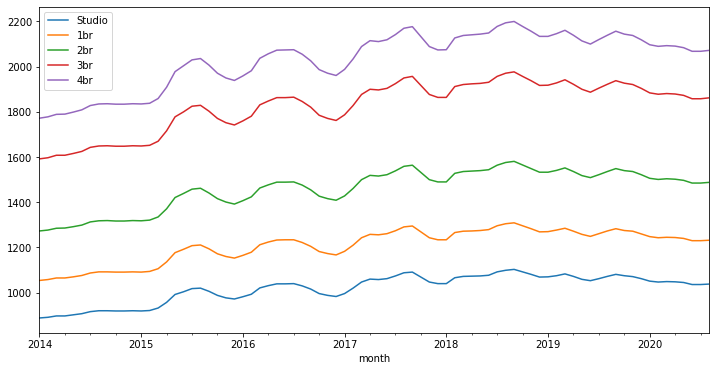

In [119]:
%matplotlib inline

subset[["Studio", "1br", "2br", "3br", "4br"]].plot(figsize=(12, 6));

In [120]:
train.tail()

,city,state,Studio,1br,2br,3br,4br
month,,,,,,,
2019-04-01,King of Prussia,PA,1072.0,1272.0,1536.0,1922.0,2139.0
2019-05-01,King of Prussia,PA,1059.0,1258.0,1518.0,1900.0,2114.0
2019-06-01,King of Prussia,PA,1053.0,1249.0,1509.0,1887.0,2100.0
2019-07-01,King of Prussia,PA,1062.0,1261.0,1522.0,1905.0,2120.0
2019-08-01,King of Prussia,PA,1072.0,1273.0,1536.0,1922.0,2139.0


In [121]:
test

,city,state,Studio,1br,2br,3br,4br
month,,,,,,,
2019-09-01,King of Prussia,PA,1081.0,1283.0,1549.0,1938.0,2157.0
2019-10-01,King of Prussia,PA,1075.0,1275.0,1540.0,1927.0,2144.0
2019-11-01,King of Prussia,PA,1071.0,1272.0,1536.0,1921.0,2138.0
2019-12-01,King of Prussia,PA,1062.0,1260.0,1522.0,1904.0,2119.0
2020-01-01,King of Prussia,PA,1051.0,1248.0,1506.0,1884.0,2097.0
2020-02-01,King of Prussia,PA,1047.0,1243.0,1501.0,1878.0,2090.0
2020-03-01,King of Prussia,PA,1049.0,1245.0,1504.0,1881.0,2093.0
2020-04-01,King of Prussia,PA,1048.0,1244.0,1502.0,1879.0,2091.0
2020-05-01,King of Prussia,PA,1045.0,1240.0,1497.0,1873.0,2084.0


In [127]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing(train["Studio"], trend="add", seasonal="add", seasonal_periods=12).fit()
predictions = model.forecast(12)

predictions

/home/shengjiyang/anaconda3/envs/citrics/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/shengjiyang/anaconda3/envs/citrics/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


2019-09-01    1066.063158
2019-10-01    1049.964138
2019-11-01    1037.903464
2019-12-01    1030.672562
2020-01-01    1033.678757
2020-02-01    1043.848603
2020-03-01    1056.549913
2020-04-01    1061.281850
2020-05-01    1065.366845
2020-06-01    1066.826006
2020-07-01    1075.309531
2020-08-01    1078.325848
Freq: MS, dtype: float64

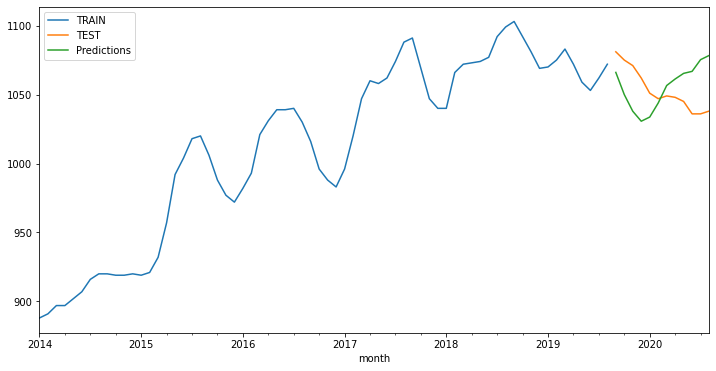

In [128]:
# subset["Studio"].plot()
train["Studio"].plot(legend=True, label="TRAIN", figsize=(12, 6))
test["Studio"].plot(legend=True, label="TEST")
predictions.plot(legend=True, label="Predictions");

In [129]:
test["Studio"].describe()

count      12.000000
mean     1053.250000
std        15.433877
min      1036.000000
25%      1043.250000
50%      1048.500000
75%      1064.250000
max      1081.000000
Name: Studio, dtype: float64

In [130]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print(mean_absolute_error(test["Studio"], predictions), mean_)

23.04410931762582


In [124]:
model = ExponentialSmoothing(subset["Studio"], trend="add", seasonal="add", seasonal_periods=12).fit()
predictions = model.forecast(12)

predictions

/home/shengjiyang/anaconda3/envs/citrics/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/home/shengjiyang/anaconda3/envs/citrics/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


2020-09-01    1033.431840
2020-10-01    1017.808429
2020-11-01    1005.782176
2020-12-01     996.855852
2021-01-01     996.032829
2021-02-01    1003.805236
2021-03-01    1014.519410
2021-04-01    1017.889577
2021-05-01    1020.344020
2021-06-01    1019.602040
2021-07-01    1026.088891
2021-08-01    1028.088884
Freq: MS, dtype: float64

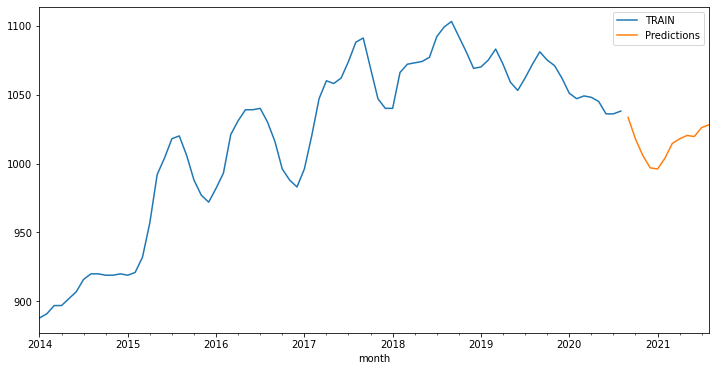

In [125]:
# subset["Studio"].plot()
subset["Studio"].plot(legend=True, label="TRAIN", figsize=(12, 6))
predictions.plot(legend=True, label="Predictions");